Finished TC sim
Finished TC sim
0.31415926535898375


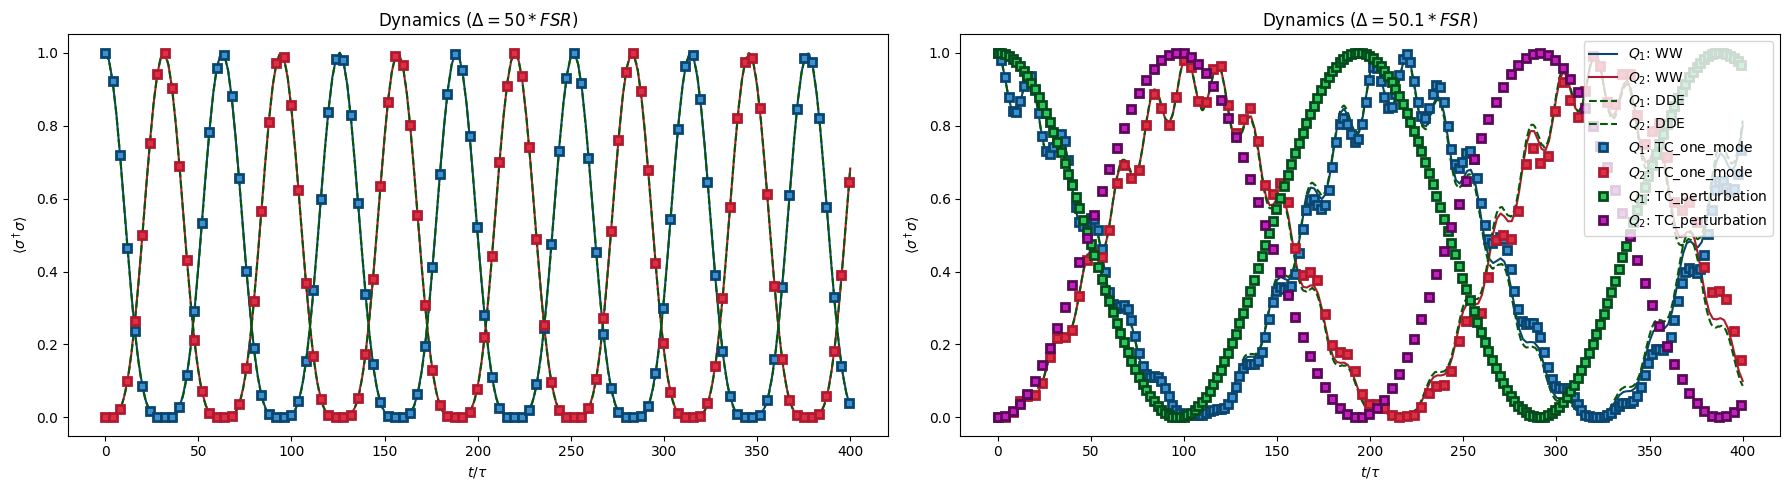

In [ ]:
from expt_sets import expt_001_dynamics

expt_001_dynamics(Delta=50.1, gamma=0.01, tau=1, T=400.0, dt_max=0.01, n_steps=201)

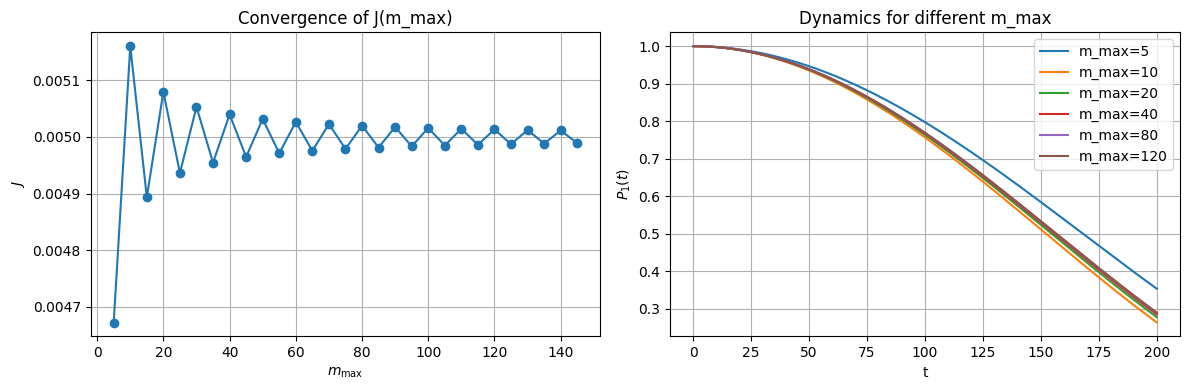

In [ ]:
from expt_sets import expt_002_perturbation_convergence
import numpy as np

expt_002_perturbation_convergence(
    Delta=0.5 * np.pi,
    gamma=0.01,
    FSR=np.pi,
    m_list=np.arange(5, 150, 5),
    sample_m=[5, 10, 20, 40, 80, 120],
    T=200,
    n_steps=2001,
)